### 결정 트리

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
x,y=load_iris(return_X_y=True)

import numpy as np
print(np.shape(x))
print(np.shape(y))

(150, 4)
(150,)


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0)
print(np.shape(X_train)) #결과값 150개 자료
print(np.shape(Y_train)) #결과값 150,4개 자료

(112, 4)
(112,)


In [34]:
#Y_train에서 0,1,2의 비율확인
#Y_test에서 0,1,2의 비율확인

def cal(data):
    cnt=[]
    for i in range(len(set(data))):
        n=0
        for num in data:
            if i==num:
                n+=1
        cnt.append(n)
    for i in range(len(cnt)):
        print(cnt[i]/len(data))

        
    

In [32]:
cal(Y_train)

0.33035714285714285
0.30357142857142855
0.36607142857142855


In [33]:
cal(Y_test)

0.34210526315789475
0.42105263157894735
0.23684210526315788


## 의사결정트리를 이용한 분류모델 제작

In [35]:
from sklearn import tree

0.9642857142857143


[Text(133.92000000000002, 181.2, 'PL <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 108.72, 'PL <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

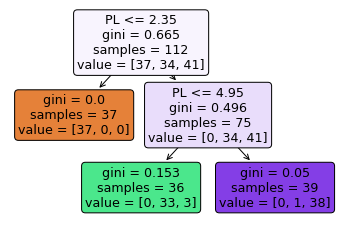

In [61]:
clf=tree.DecisionTreeClassifier(max_depth=2)
clf=clf.fit(X_train,Y_train)
print(clf.score(X_train,Y_train))
tree.plot_tree(clf,filled=True,rounded=True,
                        #special_characters=True,class_names=['Setos','Ve','Vi'],
                        feature_names=['SL','SW','PL','PW'])

In [44]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

In [45]:
Y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [46]:
clf.score(X_test,Y_test)

0.8947368421052632

In [49]:
cnt=0
for i,j in zip(clf.predict(X_test),Y_test):
    if i==j:
        cnt+=1
len(Y_test)    

38

In [51]:
!pip install graphviz
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=d800bb4fffc64fa83a19e9d9e8e88d48f7905d2ffa38c32ac823cd8f87cc3c5f
  Stored in directory: c:\users\limhyemin\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [52]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image



In [63]:
'''dot_data=export_graphviz(clf,filled=True,rounded=True,
                        special_characters=True,class_names=['Setos','Ve','Vi'],
                        feature_names=['SL','SW','PL','PW'])

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())'''

"dot_data=export_graphviz(clf,filled=True,rounded=True,\n                        special_characters=True,class_names=['Setos','Ve','Vi'],\n                        feature_names=['SL','SW','PL','PW'])\n\ngraph=pydotplus.graph_from_dot_data(dot_data)\nImage(graph.create_png())"